In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header =None , encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
X = df.iloc[:100,:2].copy().values
Y = df.iloc[:100,4].copy().values

In [33]:
Y = np.where(Y=='Iris-setosa', 0 ,1)
Y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test = train_test_split(X , Y , test_size = 0.3, random_state = 1 , stratify = Y)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
x = np.arange(-7 , 7 , 0.1)
y = sigmoid(x)

(-0.1, 1.1)

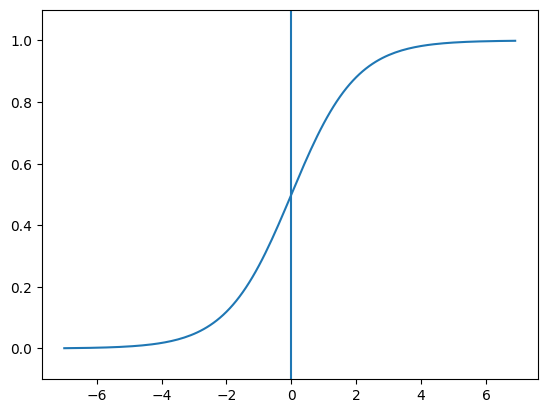

In [9]:
plt.plot(x , y)
plt.axvline(0.0)
plt.ylim([-0.1 , 1.1])

In [10]:
import sklearn

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver = 'lbfgs' , multi_class = 'ovr')

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(Tx, Ty, classifier , test_idx = None , resolution = 0.02):
  markers = ( 'o', 's' , '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen','gray',  'cyan')
  cmap = ListedColormap((colors[:len(np.unique(Ty))]))
  x1_min, x1_max = Tx[:, 0].min() -1 , Tx[:, 0].max() + 1
  x2_min, x2_max = Tx[:, 1].min() - 1, Tx[: 1].max() + 1
  xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution), np.arange(x2_min , x2_max , resolution))
  lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2 ,lab , alpha=0.1 , cmap=cmap)


  for idx, cl in enumerate(np.unique(Ty)):
    plt.scatter(Tx[Ty==cl,0],Tx[Ty==cl,1],alpha=0.8, c=colors[idx], marker=markers[idx])

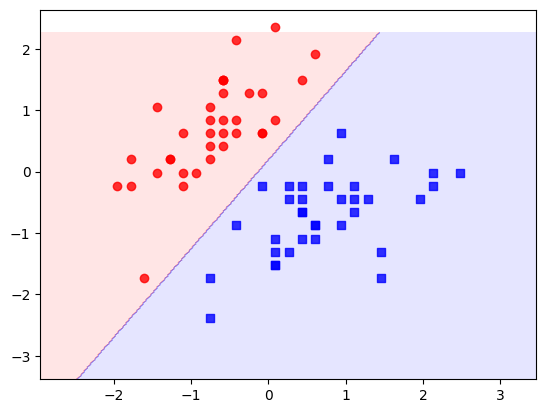

In [13]:
lr.fit(X_train_std , Y_train)
plot_decision_regions(X_train_std , Y_train , classifier = lr, test_idx=range(105,150))

Polynomial Regression

Generating non linear data for polynomial regression:

In [14]:
np.random.seed(42)
m = 100 #no. of samples
X_poly = 6*np.random.rand(m,1) - 3
Y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m,1)

Text(0, 0.5, 'y')

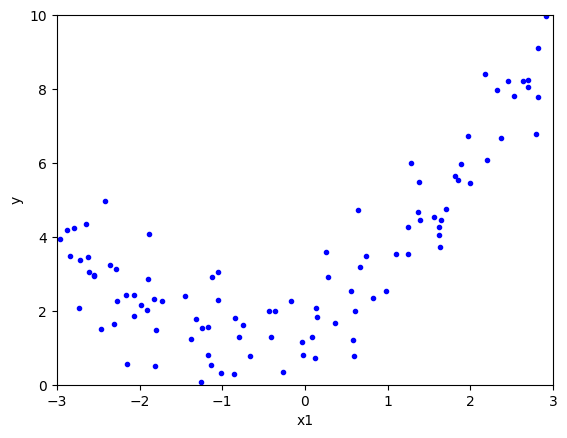

In [15]:
plt.plot(X_poly,Y_poly, 'b.')
plt.ylim(0 ,10)
plt.xlim(-3 , 3)
plt.xlabel('x1')
plt.ylabel('y')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
ploy_features = PolynomialFeatures(degree = 2 , include_bias = False)
X_poly_m = ploy_features.fit_transform(X_poly)
X_poly_m[:1]

array([[-0.75275929,  0.56664654]])

In [17]:
linear_reg = sklearn.linear_model.LinearRegression()
linear_reg.fit(X_poly_m , Y_poly)
linear_reg.intercept_ , linear_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [18]:
def line_of_best_fit(X_i , Y_i , classifier):
  X_new = np.arange(X_i[:,0].min() - 1 , X_i[:,0].max() + 1 , 0.02).reshape(-1,1)
  from sklearn.preprocessing import PolynomialFeatures
  pf = PolynomialFeatures(degree = 2 , include_bias = False)
  X_new_t = pf.fit_transform(X_new)
  Y_new = classifier.predict(X_new_t)
  plt.plot(X_new_t[:,0], Y_new , 'r')
  plt.plot(X_i[:,0], Y_i , 'b.')
  plt.xlim(-3,3)
  plt.ylim(0,10)

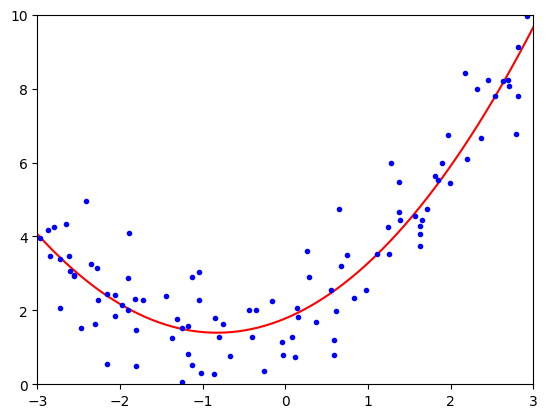

In [19]:
line_of_best_fit(X_poly_m , Y_poly, linear_reg)

(0.0, 3.0)

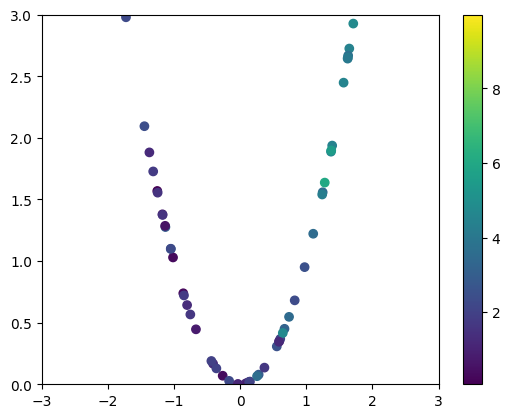

In [20]:
plt.scatter(X_poly_m[:,0], X_poly_m[:,1] , c= Y_poly , cmap = 'viridis')
plt.colorbar()
plt.xlim(-3,3)
plt.ylim(0,3)

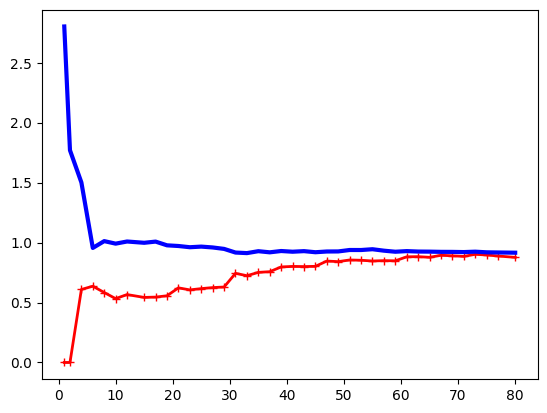

In [21]:
from sklearn.model_selection import learning_curve

train_sizes , train_scores , valid_scores = learning_curve(sklearn.linear_model.LinearRegression(), X_poly_m , Y_poly ,
                                                           train_sizes = np.linspace(0.01 , 1. , 40),
                                                           cv= 5, scoring = 'neg_root_mean_squared_error')
train_errors = - train_scores.mean(axis = 1)
valid_errors = - valid_scores.mean(axis = 1)
plt.plot(train_sizes , train_errors , 'r-+', linewidth=2, label = 'train')
plt.plot(train_sizes , valid_errors , 'b-', linewidth=3, label = 'valid')
plt.show()

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
for tri , tei in kf.split(X_poly_m):
  X_train_poly_m , X_test_poly_m = X_poly_m[tri] , X_poly_m[tei]
  Y_train_poly , Y_test_poly = Y_poly[tri] , Y_poly[tei]
  print(tri , tei)
  #train the model in this loop
  #test the model in this loop

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99] [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25

In [32]:
from sklearn.pipeline import make_pipeline
svm_classifier = make_pipeline(sklearn.preprocessing.StandardScaler() ,
                               sklearn.svm.LinearSVC(C=1. , random_state=1))
svm_classifier.fit(X , Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=1))])

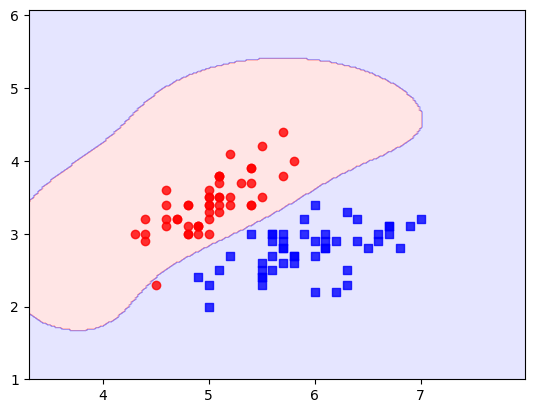

In [30]:
plot_decision_regions(X , Y, classifier = svm_classifier)